<a href="https://colab.research.google.com/github/poe0611/portfolio/blob/main/covtype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.教師なし学習/主成分分析

## 森林の木の種類

土地の標高や傾斜、土壌の種類などの情報（54項目）を入力データとしてその土地にある森林の木の種類(7種類)
を予測する


In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import pandas as pd 
import numpy as np

# fetch_covtypeデータセットを読み込む
tree = fetch_covtype()

X, y = tree.data, tree.target

columns = tree.feature_names
index = np.arange(1,len(tree.data) + 1)
df = pd.DataFrame(tree.data, index=index)
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
1,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581008,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581011,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 # 標準化（平均0, 分散1）する
scaler = StandardScaler()
 # データに合わせて計算しスケーリングする
X = scaler.fit_transform(X)

In [ ]:
# 主成分分析をインスタンス化する
pca = PCA(n_components=2, random_state=123)

In [ ]:
# 学習する
pca.fit(X)

PCA(n_components=2, random_state=123)

In [ ]:
# 主成分を写像する
X_transformed = pca.transform(X)

In [ ]:
df = pd.DataFrame(X_transformed, index=index, columns=["第一主成分", "第二主成分"])
df

,第一主成分,第二主成分
1,-2.439760,1.277231
2,-2.452285,1.228972
3,-2.723221,0.744328
4,-2.104860,1.175261
5,-2.447097,1.324878
...,...,...
581008,2.139978,1.294182
581009,2.094665,1.300500
581010,2.055231,1.058675
581011,2.047140,0.755486


In [ ]:
# 各主成分の寄与率を確認する
for i in range(len(df.columns)):
  print(pca.explained_variance_ratio_[i])

0.06851470372596814
0.05408524325079755


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


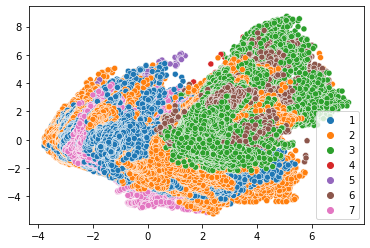

In [ ]:
# 分類結果を可視化する
sns.scatterplot(X_transformed[:, 0], X_transformed[:, 1], hue=y, palette=sns.color_palette(n_colors=7))